Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8573 - loss: 0.4655 - val_accuracy: 1.0000 - val_loss: 3.8407e-06
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 3.3813e-06 - val_accuracy: 1.0000 - val_loss: 2.4929e-06
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 1.0000 - loss: 2.5609e-06 - val_accuracy: 1.0000 - val_loss: 2.1235e-06
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 1.0000 - loss: 2.1791e-06 - val_accuracy: 1.0000 - val_loss: 1.8585e-06
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 1.9216e-06 - val_accuracy: 1.0000 - val_loss: 1.6435e-06


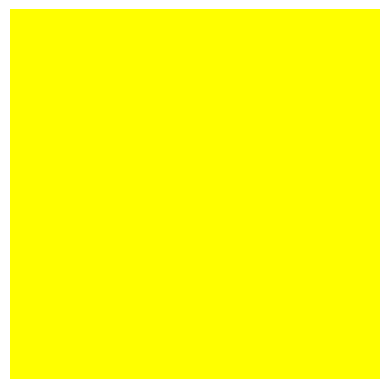

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted color: yellow


In [2]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

def generate_color_image(color, size=(32,32)):
    img = np.zeros((*size, 3), dtype=np.uint8)
    img[:,:] = color
    return img
colors = {
    "red": [255, 0, 0],
    "green": [0, 255, 0],
    "blue": [0, 0, 255],
    "yellow": [255, 255, 0],
    "cyan": [0, 255, 255],
    "magenta": [255, 0, 255]
}

X = []
y = []
for idx, (name, rgb) in enumerate(colors.items()):
    for _ in range(500):
        noise = np.random.randint(-20, 20, (32,32,3))
        img = np.clip(generate_color_image(rgb) + noise, 0, 255)
        X.append(img)
        y.append(idx)

X = np.array(X) / 255.0
y = np.array(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(colors), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

def predict_color(image):
    img = tf.image.resize(image, (32,32)) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    class_idx = np.argmax(pred)
    return list(colors.keys())[class_idx]

test_img = generate_color_image([255, 255, 0])
plt.imshow(test_img)
plt.axis("off")
plt.show()

print("Predicted color:", predict_color(test_img))